## Traversal Visits Power Law Fit

In [1]:
from collections import defaultdict

import powerlaw
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"
results_path = "/Users/mark/Desktop/wiki_v4/"


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
#load results into dataframe (~ 1min runtime)

results_path = "/Users/mark/Desktop/wiki_v4/"
with open(results_path + "clicks.json") as f:
    dict = json.load(f)
df = pd.DataFrame(dict.items())
df.columns = ['article', 'traversal visits']

df = df.sort_values(by='traversal visits', ascending=False)
df['rank'] = np.arange(1, df.shape[0]+1)

## Estimate Fit

In [6]:
powerlaw_fit_visits = powerlaw.Fit(df['traversal visits'], discrete=True)

print "alpha: ", powerlaw_fit_visits.alpha
print "xmin: ", powerlaw_fit_visits.xmin
print "gamma: ", 1 / powerlaw_fit_visits.alpha + 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit

alpha:  1.72093526731
xmin:  866.0
gamma:  1.58107938107


In [19]:
print "Kolmogorov Distance: ", powerlaw_fit_visits.D

 Kolmogorov Distance:  0.00830802635603


# Visualize Fit

## Log-Log

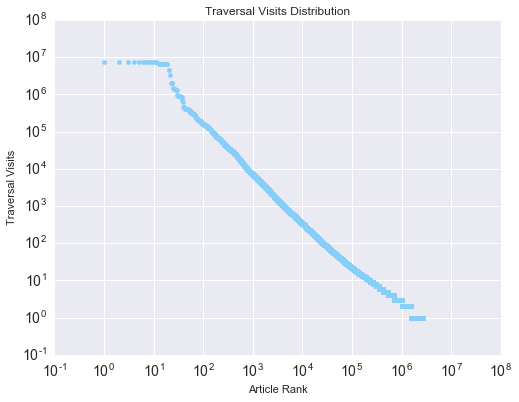

In [17]:
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal visits"],  color="#87CEFA")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('log')
axis.set_xscale('log')

#axis limits
axis.set_ylim(bottom=0.1, top=10**8)

plt.title("Traversal Visits Distribution")
plt.xlabel("Article Rank")
plt.ylabel("Traversal Visits")



## Plot against Estimated Power Law 

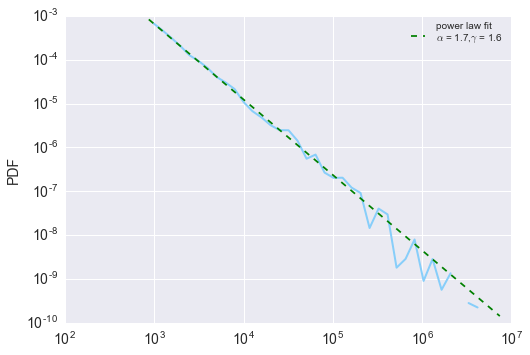

In [22]:
figCCDF = powerlaw_fit_visits.plot_pdf(color='#87CEFA', linewidth=2)
powerlaw_fit_visits.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 1.7,' + r'$\gamma$ = 1.6')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel("PDF", fontsize=14)
plt.legend(numpoints=2)

## Combined Plot

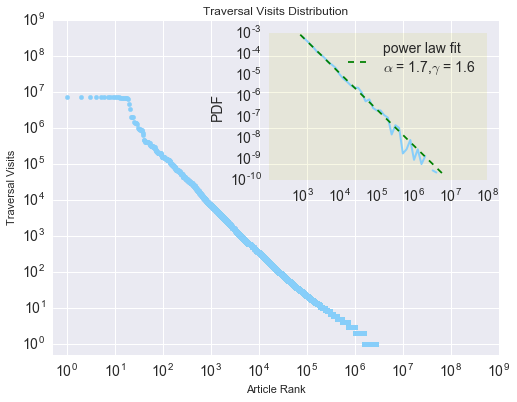

In [31]:
#defaults
sns.set()
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal visits"],  color="#87CEFA")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('log')
axis.set_xscale('log')

#axis limits
axis.set_ylim(bottom=0.5, top=10**9)
axis.set_xlim(left=0.5, right=10**9)

plt.title("Traversal Visits Distribution")
plt.xlabel("Article Rank")
plt.ylabel("Traversal Visits")


sns.set_style("dark")
#subplot in top corner
a = plt.axes([.50, .53, .38, .34], axisbg='y')


figCCDF = powerlaw_fit_visits.plot_pdf(color='#87CEFA', linewidth=2)
powerlaw_fit_visits.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 1.7,' + r'$\gamma$ = 1.6')
plt.tick_params(axis='both', which='major', labelsize=14)

a.set_xlim(left=1.2*10**2, right=10**8)

plt.ylabel("PDF", fontsize=14)
plt.legend(numpoints=2, fontsize=14)


#transparent
a.patch.set_alpha(0.1)

#reset defaults
sns.set()

## Compare against Alternative Distributions

* R is the loglikelihood ratio
* p is the p-value based on a Kolmogorov-Smirnov Test

In [24]:
R, p = powerlaw_fit_visits.distribution_compare('power_law', 'lognormal')
print "R: ", R
print "p: ", p

R:  -0.00637828372985
p:  0.964255044836


In [25]:
R, p = powerlaw_fit_visits.distribution_compare('power_law', 'exponential')
print "R: ", R
print "p: ", p

R:  10434.3116794
p:  2.54111137112e-60


In [26]:
R, p = powerlaw_fit_visits.distribution_compare('power_law', 'stretched_exponential')
print "R: ", R
print "p: ", p

R:  36.4155739441
p:  0.000127074806554


In [27]:
R, p = powerlaw_fit_visits.distribution_compare('power_law', 'truncated_power_law')
print "R: ", R
print "p: ", p

R:  -1.16133501436
p:  0.127501005173


Assuming nested distributions
